In [2]:
import pandas as pd
import json


file_path = '/Users/inny/Desktop/ybigta/DA 24-1/24-1DAmini/Dataset/total_filtered.json'

with open(file_path, "r", encoding="utf-8") as json_file:
    json_data = json.load(json_file)
    #print("Data from file:", json_data)


df_rank = pd.read_csv('/Users/inny/Desktop/ybigta/DA 24-1/24-1DAmini/리뷰분석/0317 연관성/순위별카페점수.csv') #카테고리별 점수
df_reviews = pd.read_csv('//Users/inny/Desktop/ybigta/DA 24-1/24-1DAmini/리뷰분석/0313 1차/감성분석점수(리뷰).csv') #리뷰 모음
df_rank


,상호명,맛(추천),가격(추천),웨이팅(추천),서비스(추천),분위기(추천),카공(추천),위생(추천),전체(추천)
0,Cafe HE,9.861368,9.955741,9.747960,9.932023,9.885320,9.896762,9.760179,25.239353
1,Studiowup?: Billy's House,28.254525,30.850825,26.586525,28.407775,25.586225,28.333300,26.657125,66.276300
2,What's ur color?,19.940600,19.851600,18.721800,19.721000,16.244400,19.193200,18.916400,90.589000
3,and커피바,8.640600,15.176200,11.794200,17.167000,14.199200,16.107200,13.335600,78.420000
4,old friend,4.797600,9.888000,6.358000,9.952200,10.693400,10.458200,6.316600,40.464000
...,...,...,...,...,...,...,...,...,...
328,호밀밭,6281.079722,6296.491930,6168.678656,6284.523609,6204.518788,6199.300774,6179.003751,6954.497230
329,혹스턴,137.357525,160.417175,153.278375,167.359741,162.039941,169.786505,152.863305,358.202567
330,홀리몰리,29.916800,33.314800,30.719400,34.947600,33.236600,33.266400,30.814400,136.216000
331,황카페,8.221800,10.067200,6.628400,9.989000,8.697600,8.764600,6.573600,40.942200


In [15]:
#Merge the DataFrames based on matching values in column 'a' and 'a1'
#merged_df.rename(columns={'주소': '주소'}, inplace=True)
df_reviews = df_reviews.drop_duplicates(subset='상호명', keep='first')
merged_df = pd.merge(df_rank, df_reviews, on='상호명', how='left')

# Function to extract the penultimate word from a string
def extract_penultimate_word(text):
    words = text.split()  # Split the text into words
    if len(words) >= 2:  # Ensure there are at least two words
        return words[-2]  # Return the penultimate word
    else:
        return None  # Return None if there are less than two words

# Apply the function to the 'text' column to create a new column 'penultimate_word'
merged_df['동'] = merged_df['주소'].apply(extract_penultimate_word)

merged_df
unique_values = merged_df['동'].unique()
#print(unique_values)



In [29]:
merged_df

,상호명,맛(추천),가격(추천),웨이팅(추천),서비스(추천),분위기(추천),카공(추천),위생(추천),전체(추천),review,ID,리뷰수(유저),평균별점,별점(유저),별점,리뷰수,주소,감성점수,동
0,Cafe HE,9.861368,9.955741,9.747960,9.932023,9.885320,9.896762,9.760179,25.239353,특이하다 메뉴 많다 커피 너무 없다 ㅠㅠ,W념,36,4.4,3,4.3,3,서울 서대문구 이화여대길 72-6 1층 (지번) 대현동 34-25,0.67,대현동
1,Studiowup?: Billy's House,28.254525,30.850825,26.586525,28.407775,25.586225,28.333300,26.657125,66.276300,치즈케이크 기대하다 아니다 가게 분위기 좋다 밀크 맛있다,abc,881,4.5,4,4.7,6,서울 서대문구 성산로 539 (지번) 대신동 90-8,0.75,대신동
2,What's ur color?,19.940600,19.851600,18.721800,19.721000,16.244400,19.193200,18.916400,90.589000,제품 아주 맛있다 직원 너무 친절하다,킴벌리앤 kyan,1,5.0,5,5.0,2,서울 서대문구 신촌로11길 35-7 (지번) 창천동 67-16,2.00,창천동
3,and커피바,8.640600,15.176200,11.794200,17.167000,14.199200,16.107200,13.335600,78.420000,소품 이랑 공간 하다 카페 여서 구경 하다 커피 마시기 좋다 평일 애매하다 시간대 ...,oO,12,4.8,5,5.0,1,서울 서대문구 신촌로 57 3층 301호 (지번) 창천동 72-36,2.00,창천동
4,old friend,4.797600,9.888000,6.358000,9.952200,10.693400,10.458200,6.316600,40.464000,분위기 친절하다 좋다 카페 인데 음악 선곡 너무 좋다,박모모,10,4.2,5,5.0,1,서울 서대문구 연희로25길 37 2층 (지번) 연희동 81-27,2.00,연희동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,호밀밭,6281.079722,6296.491930,6168.678656,6284.523609,6204.518788,6199.300774,6179.003751,6954.497230,너무 않다 리필 부탁 하다 주다,맛없는거 먹으면 화냄,165,4.3,5,4.3,133,서울 서대문구 신촌역로 43 1층 (지번) 창천동 4-77,0.00,창천동
329,혹스턴,137.357525,160.417175,153.278375,167.359741,162.039941,169.786505,152.863305,358.202567,커피 맛있다 조용하다 대화 하다 좋다,은구,206,4.4,4,4.1,15,서울 서대문구 연희로 91 2층 (지번) 연희동 188-4,2.00,연희동
330,홀리몰리,29.916800,33.314800,30.719400,34.947600,33.236600,33.266400,30.814400,136.216000,수박 주스 케이크 맛있다,냠,83,3.9,5,5.0,5,서울 서대문구 명물1길 16 1층 (지번) 창천동 31-21,2.00,창천동
331,황카페,8.221800,10.067200,6.628400,9.989000,8.697600,8.764600,6.573600,40.942200,사장 친절하다 카페 내부 쾌적하다 조용하다 땅콩 빙수 시키다 이라고 따로 담다 편하...,.,87,4.5,5,5.0,1,서울 서대문구 연희로 89-8 1층 (지번) 연희동 188-80,2.00,연희동


In [21]:
separate_df = merged_df.iloc[:, :9]

new_names = {'상호명': 'cafe',
             '맛(추천)': 'menu',
             '가격(추천)': 'price',
             '가격(추천)' : 'price',
             '웨이팅(추천)': 'queue',
             '서비스(추천)': 'service',
             '분위기(추천)': 'ambience', 
             '카공(추천)': 'study',
             '위생(추천)': 'hygiene',
             '전체(추천)': 'overall' 
        }

# Rename the features
separate_df.rename(columns=new_names, inplace=True)

# Display the updated DataFrame

separate_df


,cafe,menu,price,queue,service,ambience,study,hygiene,overall
0,Cafe HE,9.861368,9.955741,9.747960,9.932023,9.885320,9.896762,9.760179,25.239353
1,Studiowup?: Billy's House,28.254525,30.850825,26.586525,28.407775,25.586225,28.333300,26.657125,66.276300
2,What's ur color?,19.940600,19.851600,18.721800,19.721000,16.244400,19.193200,18.916400,90.589000
3,and커피바,8.640600,15.176200,11.794200,17.167000,14.199200,16.107200,13.335600,78.420000
4,old friend,4.797600,9.888000,6.358000,9.952200,10.693400,10.458200,6.316600,40.464000
...,...,...,...,...,...,...,...,...,...
328,호밀밭,6281.079722,6296.491930,6168.678656,6284.523609,6204.518788,6199.300774,6179.003751,6954.497230
329,혹스턴,137.357525,160.417175,153.278375,167.359741,162.039941,169.786505,152.863305,358.202567
330,홀리몰리,29.916800,33.314800,30.719400,34.947600,33.236600,33.266400,30.814400,136.216000
331,황카페,8.221800,10.067200,6.628400,9.989000,8.697600,8.764600,6.573600,40.942200


/var/folders/6r/2dxktvgd4hjcdz28_t39kcl80000gn/T/ipykernel_8326/1346663251.py:20: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from current font.
  plt.tight_layout()
/var/folders/6r/2dxktvgd4hjcdz28_t39kcl80000gn/T/ipykernel_8326/1346663251.py:20: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  plt.tight_layout()
/var/folders/6r/2dxktvgd4hjcdz28_t39kcl80000gn/T/ipykernel_8326/1346663251.py:20: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from current font.
  plt.tight_layout()
/var/folders/6r/2dxktvgd4hjcdz28_t39kcl80000gn/T/ipykernel_8326/1346663251.py:20: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
/var/folders/6r/2dxktvgd4hjcdz28_t39kcl80000gn/T/ipykernel_8326/1346663251.py:20: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
/var/folders/6r/2dxktvgd4hjcdz28_t39kcl80000gn/T/ipykernel_8326/1346663251.py:20: UserWarning: Gly

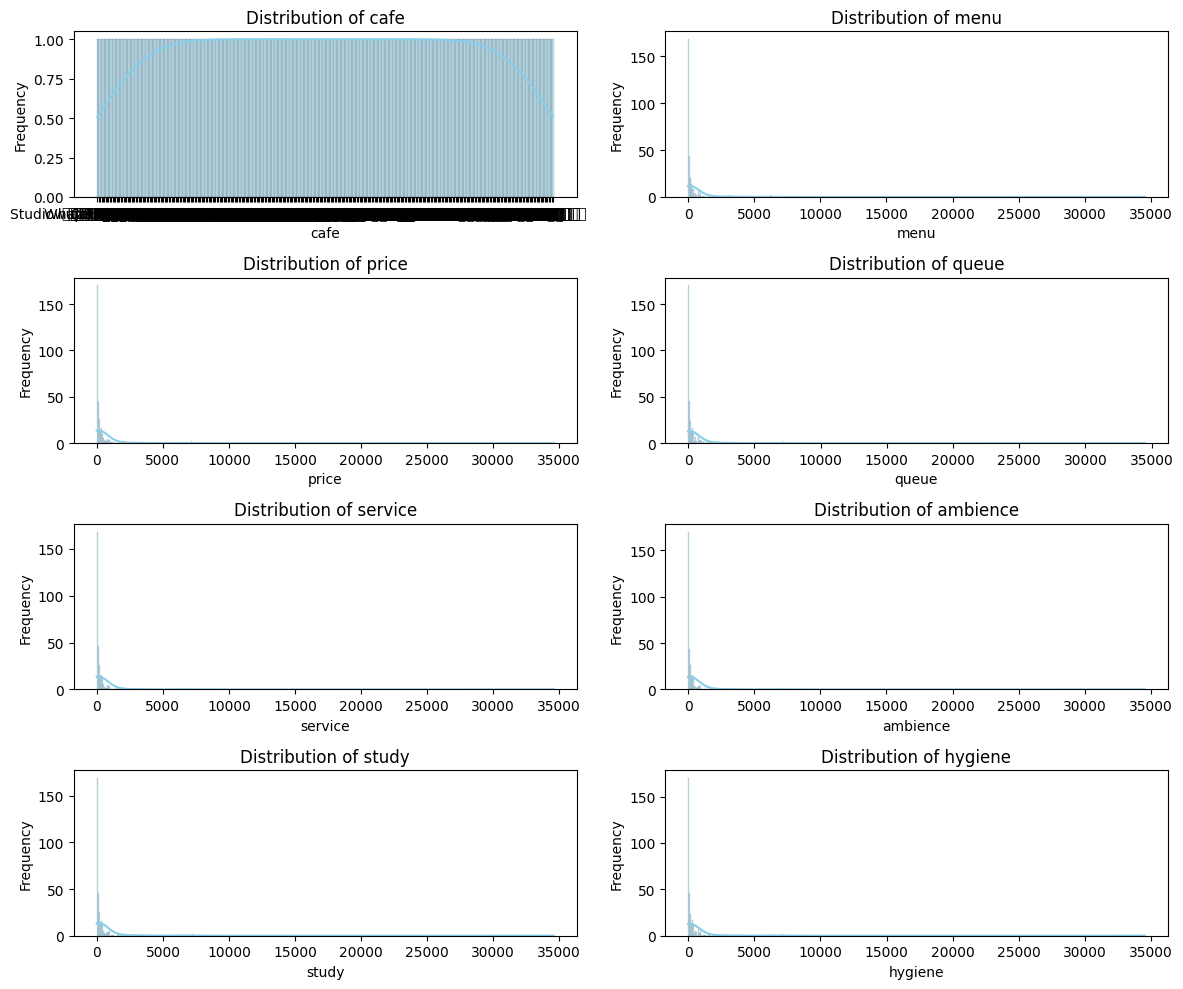

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and feature_names contains the names of your 8 features
feature_names = separate_df.columns.tolist()

# Create subplots for each feature
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

for i, ax in enumerate(axes.flatten()):
    if i < len(feature_names):
        sns.histplot(separate_df[feature_names[i]], kde=True, color='skyblue', ax=ax)
        ax.set_title(f'Distribution of {feature_names[i]}')
        ax.set_xlabel(feature_names[i])
        ax.set_ylabel('Frequency')
    else:
        ax.remove()  # Remove empty subplots if there are fewer than 8 features

plt.tight_layout()
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer


# Separate the identifier column from the numeric columns
id_column = separate_df['cafe']
numeric_columns = separate_df.drop(columns=['cafe'])

scaled_numeric_columns = pd.DataFrame(StandardScaler().fit_transform(numeric_columns), columns=numeric_columns.columns, index=numeric_columns.index)
df_scale = pd.concat([id_column, scaled_numeric_columns], axis=1)

df_scale



,cafe,menu,price,queue,service,ambience,study,hygiene,overall
0,Cafe HE,-0.226144,-0.230614,-0.225979,-0.230758,-0.229855,-0.230336,-0.226228,-0.276757
1,Studiowup?: Billy's House,-0.217520,-0.220863,-0.218077,-0.222136,-0.222513,-0.221724,-0.218302,-0.259068
2,What's ur color?,-0.221418,-0.225996,-0.221768,-0.226190,-0.226882,-0.225993,-0.221933,-0.248588
3,and커피바,-0.226716,-0.228178,-0.225019,-0.227382,-0.227838,-0.227435,-0.224551,-0.253833
4,old friend,-0.228518,-0.230645,-0.227570,-0.230748,-0.229477,-0.230074,-0.227843,-0.270194
...,...,...,...,...,...,...,...,...,...
328,호밀밭,2.714064,2.702957,2.664582,2.697168,2.667031,2.660932,2.667410,2.710154
329,혹스턴,-0.166368,-0.160402,-0.158617,-0.157297,-0.158701,-0.155646,-0.159106,-0.133231
330,홀리몰리,-0.216741,-0.219713,-0.216137,-0.219085,-0.218935,-0.219419,-0.216352,-0.228920
331,황카페,-0.226912,-0.230562,-0.227444,-0.230731,-0.230411,-0.230865,-0.227722,-0.269988


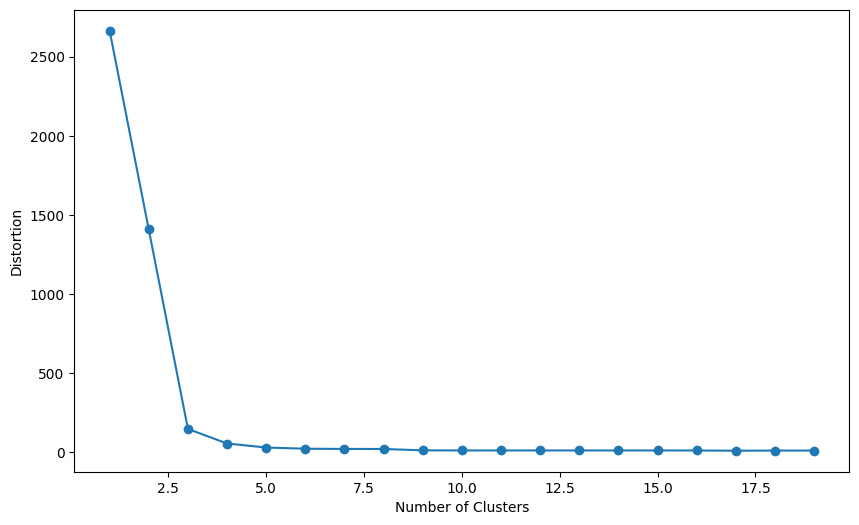

In [27]:
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  

df_forclustering = df_scale.drop(columns=['cafe'])

distortions = []
for i in range(1,20):
    km = KMeans(
    n_clusters= i, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
    )
    km.fit(df_forclustering) # elbow 계산할 dataset 적기
    # inertia는 군집내 분산을 의미
    distortions.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

#결론: 군집이 3-4개 정도가 적당하다

In [30]:
# 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_forclustering)

# 클러스터 할당 결과를 데이터프레임에 추가
df_forclustering['cluster'] = kmeans.labels_

unique_values = df_forclustering['cluster'].unique()
print(unique_values)

df_postclustering = df_forclustering.copy()
df_postclustering['동'] = merged_df['동']
df_postclustering['상호명'] = merged_df['상호명']
df_postclustering

[0 1 2]


/Users/inny/anaconda3/envs/ybenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,menu,price,queue,service,ambience,study,hygiene,overall,cluster,동,상호명
0,-0.226144,-0.230614,-0.225979,-0.230758,-0.229855,-0.230336,-0.226228,-0.276757,0,대현동,Cafe HE
1,-0.217520,-0.220863,-0.218077,-0.222136,-0.222513,-0.221724,-0.218302,-0.259068,0,대신동,Studiowup?: Billy's House
2,-0.221418,-0.225996,-0.221768,-0.226190,-0.226882,-0.225993,-0.221933,-0.248588,0,창천동,What's ur color?
3,-0.226716,-0.228178,-0.225019,-0.227382,-0.227838,-0.227435,-0.224551,-0.253833,0,창천동,and커피바
4,-0.228518,-0.230645,-0.227570,-0.230748,-0.229477,-0.230074,-0.227843,-0.270194,0,연희동,old friend
...,...,...,...,...,...,...,...,...,...,...,...
328,2.714064,2.702957,2.664582,2.697168,2.667031,2.660932,2.667410,2.710154,2,창천동,호밀밭
329,-0.166368,-0.160402,-0.158617,-0.157297,-0.158701,-0.155646,-0.159106,-0.133231,0,연희동,혹스턴
330,-0.216741,-0.219713,-0.216137,-0.219085,-0.218935,-0.219419,-0.216352,-0.228920,0,창천동,홀리몰리
331,-0.226912,-0.230562,-0.227444,-0.230731,-0.230411,-0.230865,-0.227722,-0.269988,0,연희동,황카페


In [31]:
# Group the DataFrame by cluster labels
cluster_groups = df_forclustering.groupby('cluster')

# Iterate through each cluster group and analyze its characteristics
for cluster_label, cluster_data in cluster_groups:
    print(f"\nCluster {cluster_label} Information:")
    print(cluster_data.describe())


Cluster 0 Information:
             menu       price       queue     service    ambience       study  \
count  319.000000  319.000000  319.000000  319.000000  319.000000  319.000000   
mean    -0.134051   -0.134630   -0.134073   -0.134614   -0.134507   -0.134532   
std      0.179023    0.182495    0.178574    0.182631    0.181981    0.182289   
min     -0.233248   -0.239376   -0.235263   -0.240261   -0.239076   -0.239961   
25%     -0.224181   -0.227621   -0.223884   -0.227652   -0.227032   -0.227348   
50%     -0.205688   -0.207584   -0.205665   -0.208024   -0.207514   -0.207664   
75%     -0.132220   -0.131702   -0.132748   -0.131280   -0.130272   -0.130713   
max      0.935047    0.940961    0.923320    0.934404    0.929847    0.932290   

          hygiene     overall  cluster  
count  319.000000  319.000000    319.0  
mean    -0.134066   -0.140475      0.0  
std      0.178758    0.223154      0.0  
min     -0.235452   -0.324718      0.0  
25%     -0.223968   -0.270069      0.0  


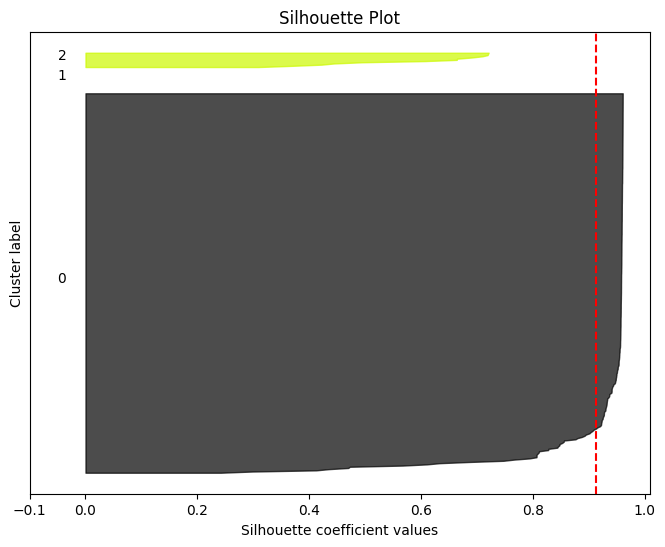

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming df contains your feature data
# Assuming kmeans is your fitted KMeans model
# Assuming cluster_labels contains the cluster labels assigned by KMeans


cluster_labels = kmeans.labels_
# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(df_forclustering, cluster_labels)

# Compute the average silhouette score
average_silhouette_score = silhouette_score(df_forclustering, cluster_labels)

# Plot silhouette plot
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(kmeans.n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size

    color = plt.cm.nipy_spectral(float(i) / kmeans.n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title('Silhouette Plot')
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
plt.axvline(x=average_silhouette_score, color='red', linestyle='--')
plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


In [33]:
total_counts = df_postclustering['동'].value_counts()
print("total counts: ", total_counts)


cluster_0 = df_postclustering[df_postclustering['cluster'] == 0]
counts_0 = cluster_0['동'].value_counts()
print("Counts of unique values in cluster 0")
print(counts_0)


cluster_1 = df_postclustering[df_postclustering['cluster'] == 1]
counts_1 = cluster_1['동'].value_counts()
print("Counts of unique values in cluster 1")
print(counts_1)

cluster_2 = df_postclustering[df_postclustering['cluster'] == 2]
counts_2 = cluster_2['동'].value_counts()
print("Counts of unique values in cluster 2")
print(counts_2)

total counts:  동
연희동    135
창천동    114
대현동     74
대신동     10
Name: count, dtype: int64
Counts of unique values in cluster 0
동
연희동    127
창천동    109
대현동     73
대신동     10
Name: count, dtype: int64
Counts of unique values in cluster 1
동
창천동    1
Name: count, dtype: int64
Counts of unique values in cluster 2
동
연희동    8
창천동    4
대현동    1
Name: count, dtype: int64
